In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/Alzheimer zip/archive (5).zip'

# Destination directory to extract the dataset
extracted_path = '/content/dataset'

# Extract the zip file
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Now your dataset is extracted in 'extracted_path' directory
# You can access the images from this directory

# Example of how to access the images:
import os
# List the contents of the directory
dataset_files = os.listdir(extracted_path)
print(dataset_files)

# Now you can work with the images in the dataset_files list


Mounted at /content/drive
['Alzheimer_s Dataset']


In [ ]:
import os
import zipfile
import numpy as np
from skimage.io import imread

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/Alzheimer zip/archive (5).zip'

# Destination directory to extract the dataset
extracted_path = '/content/Alzheimer_dataset'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Directory paths for train and test data
train_data_dir = os.path.join(extracted_path, 'Alzheimer_s Dataset', 'train')
test_data_dir = os.path.join(extracted_path, 'Alzheimer_s Dataset', 'test')

# Function to load images from directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return np.array(images)

# Load train images
train_images = []
train_labels = []
for class_folder in os.listdir(train_data_dir):
    class_path = os.path.join(train_data_dir, class_folder)
    if os.path.isdir(class_path):
        images = load_images_from_folder(class_path)
        train_images.extend(images)
        train_labels.extend([class_folder] * len(images))

# Load test images
test_images = []
test_labels = []
for class_folder in os.listdir(test_data_dir):
    class_path = os.path.join(test_data_dir, class_folder)
    if os.path.isdir(class_path):
        images = load_images_from_folder(class_path)
        test_images.extend(images)
        test_labels.extend([class_folder] * len(images))

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Reshape images for logistic regression (flatten)
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Check the shape of the data
print("Train images shape:", train_images_flat.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images_flat.shape)
print("Test labels shape:", test_labels.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train images shape: (5121, 36608)
Train labels shape: (5121,)
Test images shape: (1279, 36608)
Test labels shape: (1279,)


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
model = LogisticRegression(max_iter=50)

# Train the model
model.fit(train_images_flat, train_labels)

# Predict on the test set
predictions = model.predict(test_images_flat)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5551211884284597


**SVM MODEL- LINEAR**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm = SVC(kernel='linear', C=1.0)

# Train the SVM classifier
svm.fit(train_images_flat, train_labels)

# Predict on the test set
predictions_svm = svm.predict(test_images_flat)

# Calculate accuracy
accuracy_svm = accuracy_score(test_labels, predictions_svm)
print("SVM Accuracy:", accuracy_svm)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate SVM model
print("SVM Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(test_labels, predictions_svm))
print("Confusion Matrix:")
print(confusion_matrix(test_labels, predictions_svm))


SVM Accuracy: 0.63721657544957
Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.89      0.27      0.41       179
ModerateDemented       1.00      0.33      0.50        12
     NonDemented       0.66      0.81      0.72       640
VeryMildDemented       0.57      0.55      0.56       448

        accuracy                           0.64      1279
       macro avg       0.78      0.49      0.55      1279
    weighted avg       0.66      0.64      0.62      1279

Confusion Matrix:
[[ 48   0  66  65]
 [  0   4   4   4]
 [  3   0 516 121]
 [  3   0 198 247]]


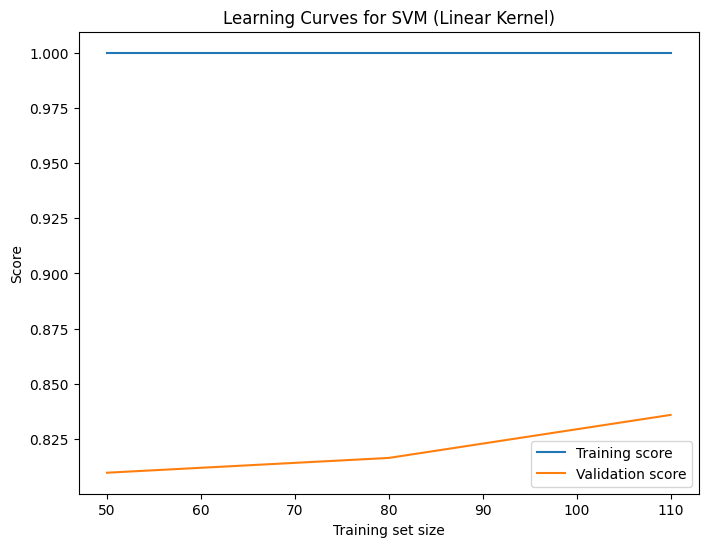

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

X, y = load_digits(return_X_y=True)
train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5
)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curves for SVM (Linear Kernel)')
plt.legend()
plt.show()


**SVM MODEL- RBF**

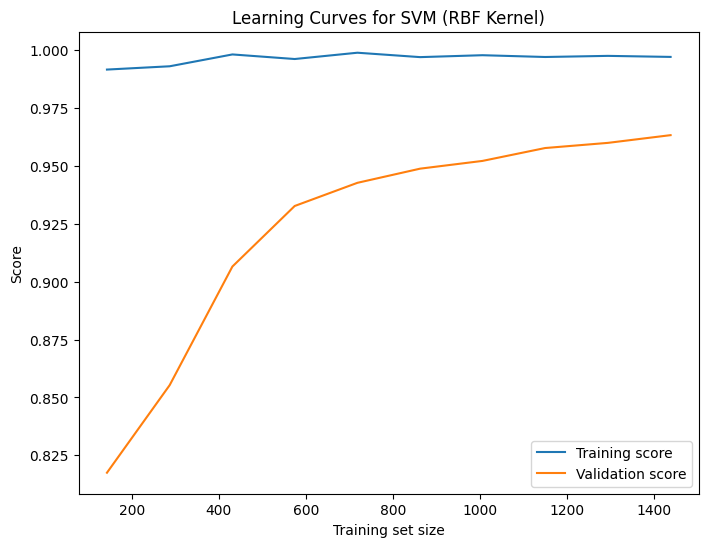

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

X, y = load_digits(return_X_y=True)

# Using larger range of training sizes
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 evenly spaced training set sizes from 10% -100%

train_sizes_abs, train_scores, valid_scores = learning_curve(
    SVC(kernel='rbf', C=1.0, gamma='scale'), X, y, train_sizes=train_sizes, cv=5
)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_abs, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes_abs, np.mean(valid_scores, axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curves for SVM (RBF Kernel)')
plt.legend()
plt.show()


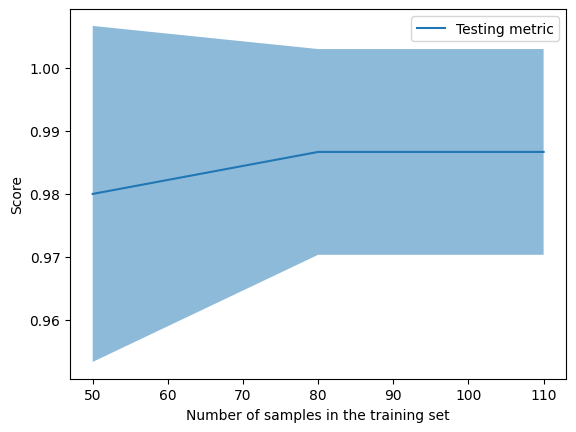

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
LearningCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, train_sizes=[50, 80, 110], cv=5)

CNN

In [1]:
import numpy as np
import os
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [13]:
import os
import zipfile
import numpy as np
from skimage.io import imread

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/Alzheimer zip/archive (5).zip'

# Destination directory to extract the dataset
extracted_path = '/content/Alzheimer_dataset'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Directory paths for train and test data
train_data_dir = os.path.join(extracted_path, 'Alzheimer_s Dataset', 'train')
test_data_dir = os.path.join(extracted_path, 'Alzheimer_s Dataset', 'test')

# Function to load images from directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return np.array(images)

# Load train images
train_images = []
train_labels = []
class_names = sorted(os.listdir(train_data_dir))  # List of class names
for class_folder in class_names:
    class_path = os.path.join(train_data_dir, class_folder)
    if os.path.isdir(class_path):
        images = load_images_from_folder(class_path)
        train_images.extend(images)
        train_labels.extend([class_folder] * len(images))

# Load test images
test_images = []
test_labels = []
class_names= sorted(os.listdir(test_data_dir))
for class_folder in class_names:
    class_path = os.path.join(test_data_dir, class_folder)
    if os.path.isdir(class_path):
        images = load_images_from_folder(class_path)
        test_images.extend(images)
        test_labels.extend([class_folder] * len(images))

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Reshape images for logistic regression (flatten)
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Check the shape of the data
print("Train images shape:", train_images_flat.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images_flat.shape)
print("Test labels shape:", test_labels.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train images shape: (5121, 36608)
Train labels shape: (5121,)
Test images shape: (1279, 36608)
Test labels shape: (1279,)


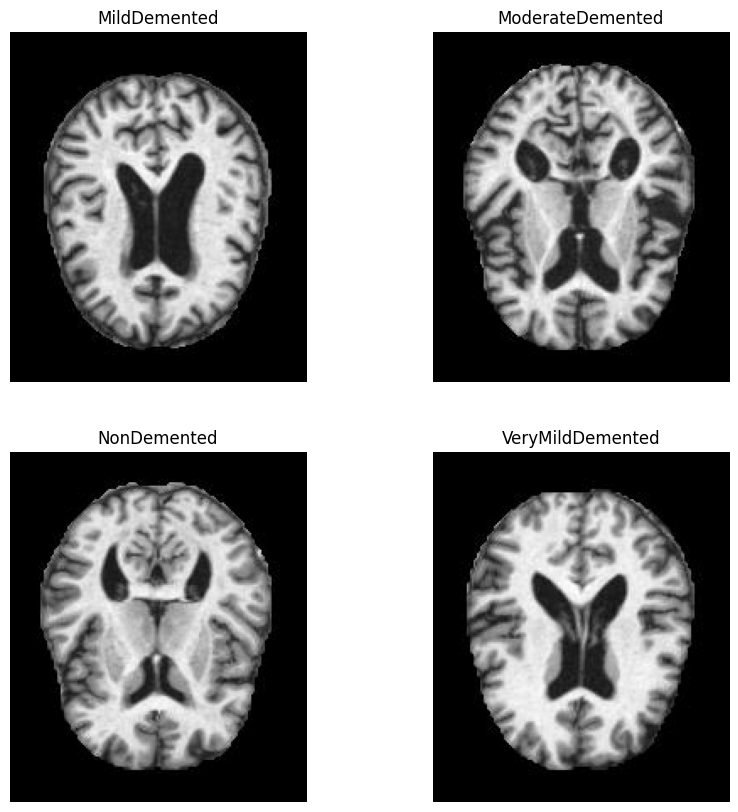

In [14]:
# Display random images from each class
plt.figure(figsize=(10, 10))
for i, class_name in enumerate(class_names):
    # Get a random image from the class directory
    img_name = np.random.choice(os.listdir(os.path.join(train_data_dir, class_name)))
    img_path = os.path.join(train_data_dir, class_name, img_name)

    # Read and display the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.show()

In [15]:
# Function to preprocess images
def preprocess_image(image_path, label):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    return image, label

In [17]:
# Load image paths and labels
X = []
y = []
for class_name in class_names:
    class_dir = os.path.join(train_data_dir, class_name)
    for img_name in os.listdir(class_dir):
        X.append(os.path.join(class_dir, img_name))
        y.append(class_name)

In [18]:
# Split data into training and testing sets while maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
# Count number of samples in each class for training and testing sets
train_class_counts = np.unique(y_train, return_counts=True)
test_class_counts = np.unique(y_test, return_counts=True)

In [21]:
# Print the count of each class for training set before upsampling
print("Training Set Class Counts (Before Upsampling):")
for class_name, count in zip(train_class_counts[0], train_class_counts[1]):
    print(f"{class_name}: {count} samples")

# Print the count of each class for testing set
print("\nTesting Set Class Counts:")
for class_name, count in zip(test_class_counts[0], test_class_counts[1]):
    print(f"{class_name}: {count} samples")

Training Set Class Counts (Before Upsampling):
MildDemented: 573 samples
ModerateDemented: 42 samples
NonDemented: 2048 samples
VeryMildDemented: 1433 samples

Testing Set Class Counts:
MildDemented: 144 samples
ModerateDemented: 10 samples
NonDemented: 512 samples
VeryMildDemented: 359 samples


In [22]:
# Function to upsample minority classes
def upsample_minority_classes(X_train, y_train):
    df_train = pd.DataFrame({'image_path': X_train, 'class': y_train})
    class_counts = df_train['class'].value_counts()
    max_class_count = class_counts.max()

    dfs_upsampled = []
    for class_name, count in class_counts.items():
        df_class = df_train[df_train['class'] == class_name]
        if count < max_class_count:
            df_upsampled = resample(df_class, replace=True, n_samples=max_class_count, random_state=42)
            dfs_upsampled.append(df_upsampled)
        else:
            dfs_upsampled.append(df_class)

    df_train_upsampled = pd.concat(dfs_upsampled)
    X_train_upsampled = df_train_upsampled['image_path'].values
    y_train_upsampled = df_train_upsampled['class'].values
    return X_train_upsampled, y_train_upsampled

In [23]:
# Function to upsample minority classes in test data
def upsample_test_minority_classes(X_test, y_test):
    # Combine features and labels into a DataFrame
    df_test = pd.DataFrame({'image_path': X_test, 'label': y_test})

    # Separate majority and minority classes
    df_majority_test = df_test[df_test['label'].isin(['NonDemented'])]
    df_minority1_test = df_test[df_test['label'].isin(['MildDemented'])]
    df_minority2_test = df_test[df_test['label'].isin(['ModerateDemented'])]
    df_minority3_test = df_test[df_test['label'].isin(['VeryMildDemented'])]

    # Upsample minority classes
    df_minority_upsampled1_test = resample(df_minority1_test, replace=True, n_samples=len(df_majority_test), random_state=42)
    df_minority_upsampled2_test = resample(df_minority2_test, replace=True, n_samples=len(df_majority_test), random_state=42)
    df_minority_upsampled3_test = resample(df_minority3_test, replace=True, n_samples=len(df_majority_test), random_state=42)

    # Combine majority class with upsampled minority classes
    df_upsampled_test = pd.concat([df_majority_test, df_minority_upsampled1_test, df_minority_upsampled2_test, df_minority_upsampled3_test])

    # Shuffle the dataframe
    df_upsampled_test = df_upsampled_test.sample(frac=1, random_state=42).reset_index(drop=True)

    # Separate features and labels
    X_test_upsampled = df_upsampled_test['image_path'].values
    y_test_upsampled = df_upsampled_test['label'].values

    return X_test_upsampled, y_test_upsampled

In [24]:
# Upsample minority classes in the training set
X_train_upsampled, y_train_upsampled = upsample_minority_classes(X_train, y_train)
# Upsample minority classes in the test set
X_test_upsampled, y_test_upsampled = upsample_test_minority_classes(X_test, y_test)

In [25]:
# Augmented data generator for training
train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest",
                                   rescale=1./255)

In [26]:
# Data generator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
# Training data generator
train_generator = train_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': X_train_upsampled, 'class': y_train_upsampled}),
    x_col='image_path',
    y_col='class',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

# Testing data generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': X_test_upsampled, 'label': y_test_upsampled}),
    directory=None,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

Found 8192 validated image filenames belonging to 4 classes.
Found 2048 validated image filenames belonging to 4 classes.


In [29]:
# After applying ImageDataGenerator, you can check the count of each label
train_label_counts = train_generator.classes
test_label_counts = test_generator.classes

# Count occurrences of each class label
train_label_counts = np.bincount(train_label_counts)
test_label_counts = np.bincount(test_label_counts)

In [31]:
# Print the count of each class for the training set
print("Training Set Class Counts (After Augmentation):")
for i, count in enumerate(train_label_counts):
    print(f"Class {i}: {count} samples")

# Print the count of each class for the testing set
print("\nTesting Set Class Counts:")
for i, count in enumerate(test_label_counts):
    print(f"Class {i}: {count} samples")

Training Set Class Counts (After Augmentation):
Class 0: 2048 samples
Class 1: 2048 samples
Class 2: 2048 samples
Class 3: 2048 samples

Testing Set Class Counts:
Class 0: 512 samples
Class 1: 512 samples
Class 2: 512 samples
Class 3: 512 samples


In [54]:
#import paskages
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from sklearn.utils import resample


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications import VGG16
from keras.layers import *
from sklearn.metrics import classification_report, accuracy_score

In [38]:
# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 128)      

In [49]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath="best_weights.weights.h5", monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)

In [56]:
import tensorflow as tf

# Set eager execution mode
tf.config.run_functions_eagerly(True)

# Train model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    epochs=50,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


128/128 [==============================] - ETA: 0s - loss: 1.3572 - accuracy: 0.3044
Epoch 1: val_loss improved from inf to 1.14667, saving model to best_weights.weights.h5
128/128 [==============================] - 129s 970ms/step - loss: 1.3572 - accuracy: 0.3044 - val_loss: 1.1467 - val_accuracy: 0.4824
Epoch 2/50
128/128 [==============================] - ETA: 0s - loss: 1.1134 - accuracy: 0.4946
Epoch 2: val_loss improved from 1.14667 to 0.83875, saving model to best_weights.weights.h5
128/128 [==============================] - 123s 960ms/step - loss: 1.1134 - accuracy: 0.4946 - val_loss: 0.8388 - val_accuracy: 0.6123
Epoch 3/50
128/128 [==============================] - ETA: 0s - loss: 0.9206 - accuracy: 0.5730
Epoch 3: val_loss did not improve from 0.83875
128/128 [==============================] - 121s 947ms/step - loss: 0.9206 - accuracy: 0.5730 - val_loss: 0.9751 - val_accuracy: 0.5938
Epoch 4/50
128/128 [==============================] - ETA: 0s - loss: 0.8123 - accuracy: 0.

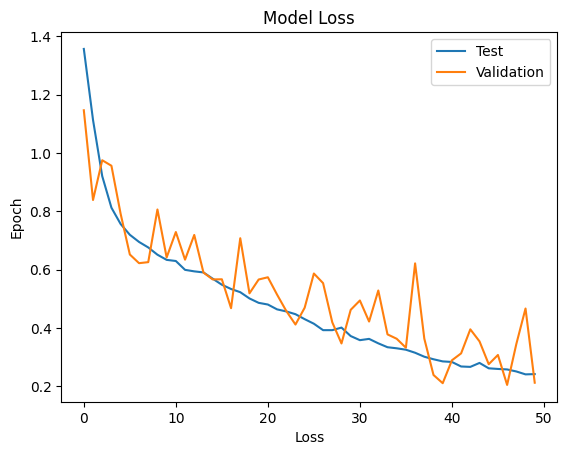

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

In [58]:
# Display model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 128)      

In [59]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

32/32 [==============================] - 6s 181ms/step - loss: 0.2115 - accuracy: 0.9263
Test Loss: 0.21150125563144684
Test Accuracy: 0.92626953125


In [60]:
# Generate predictions
test_predictions = model.predict(test_generator)
predicted_classes = np.argmax(test_predictions, axis=1)

32/32 [==============================] - 9s 285ms/step


In [61]:
# True classes
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [62]:
# Classification Report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

                  precision    recall  f1-score   support

    MildDemented       0.21      0.21      0.21       512
ModerateDemented       0.25      0.25      0.25       512
     NonDemented       0.26      0.27      0.27       512
VeryMildDemented       0.23      0.22      0.23       512

        accuracy                           0.24      2048
       macro avg       0.24      0.24      0.24      2048
    weighted avg       0.24      0.24      0.24      2048



In [63]:
# Confusion Matrix
conf_matrix = tf.math.confusion_matrix(labels=true_classes, predictions=predicted_classes)
conf_matrix

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[108, 138, 138, 128],
       [137, 126, 125, 124],
       [123, 129, 140, 120],
       [147, 119, 133, 113]], dtype=int32)>

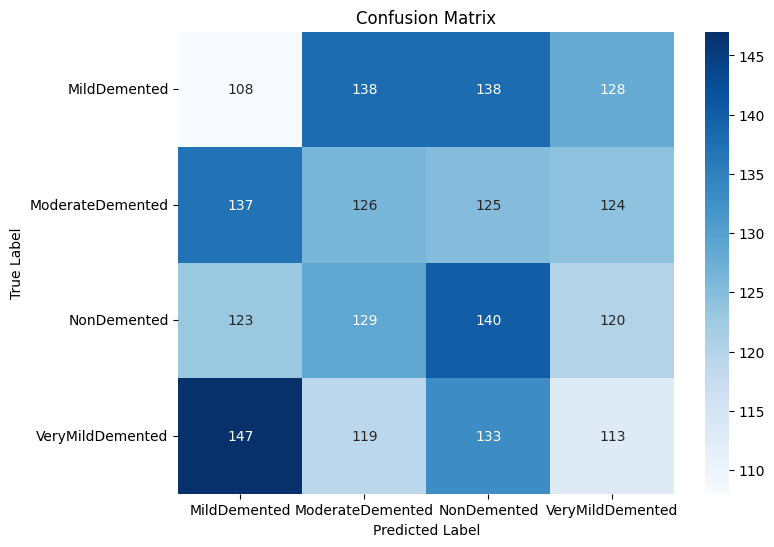

In [64]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [65]:
#save model
model.save('alzheimer_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
